In [1]:
#import all the things we need
%matplotlib inline
from qutip import*
import numpy as np

from scipy import *

import matplotlib.pyplot as plt

import time

# Here we import bostix
from bostix.solver import DPSolver

# Decay Test

No pump, single mode

In [2]:
data = DPSolver(dim=[4], ham=[], col=[(1, "a")])
print(data)

DPSolver(dim=[4], ham=[], col=[(1, [2])], _ep_deriver=None, _dp_solver=None)


In [3]:
matrix_mapper = data.solve(2, 1e-5, alpha=0.5)
rho_ss=np.mat(matrix_mapper.row_rho().as_2d_list())
print("The density matrix:")
print(rho_ss)
print("The population:")
print(matrix_mapper.avg_moment([1]))

The density matrix:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
The population:
0j


# Single Mode Pump Test

Pump is applied, with detuning, and the Hamiltonian can be written as
$$
\hat{H}=E(\hat{a}+\hat{a}^\dagger)+\Delta\hat{a}^\dagger\hat{a}
$$

## QuTip

In [4]:
E=0.3
kappa=1
delta=0.5;
Na=3; 
a=destroy(Na)
H=E*(a.dag()+a)+delta*a.dag()*a
psi0=basis(Na,0)
track=[a.dag()*a]
c_ops=[]
c_ops.append(np.sqrt(kappa)*a)

In [5]:
tlist=np.linspace(0,15,1000)
opts = Options()
opts.store_states=True
ts=time.time()
output=mesolve(H,psi0,tlist,c_ops,track,options=opts)
te=time.time()
t_qutip_f=te-ts

Text(0, 0.5, '$N_a$')

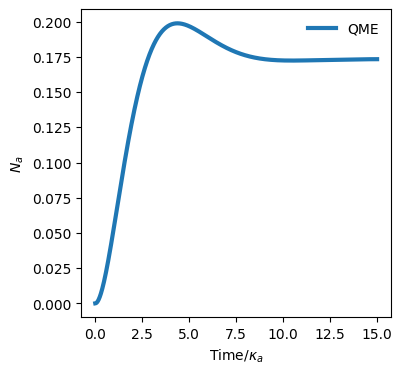

In [6]:
fig, axes = plt.subplots(1,1,figsize=(4,4))

#axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes.plot(tlist, output.expect[0],linewidth=3,label="QME")

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel('Time/'+r'$\kappa_a$')
axes.set_ylabel(r'$N_a$')

In [7]:
ts=time.time()
rho_ss_qutip=steadystate(H,c_ops)
te=time.time()
t_qutip=te-ts
print("Time cost:"+str(t_qutip_f)+'s')
print("Time cost:"+str(t_qutip)+'s')

Time cost:0.03219246864318848s
Time cost:0.0022177696228027344s


In [8]:
print("The density matrix:")
print(output.states[-1])
print(rho_ss_qutip)

The density matrix:
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 8.38910636e-01-1.56314258e-18j -2.47910401e-01+2.48091510e-01j
  -6.44795718e-05-9.65373685e-02j]
 [-2.47910401e-01-2.48091510e-01j  1.48802476e-01+3.96092859e-18j
  -2.89529191e-02+2.89693308e-02j]
 [-6.44795718e-05+9.65373685e-02j -2.89529191e-02-2.89693308e-02j
   1.22868877e-02-2.71113140e-18j]]
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 8.38920067e-01+0.j         -2.47990293e-01+0.24799029j
  -3.46944695e-18-0.09652603j]
 [-2.47990293e-01-0.24799029j  1.48794176e-01+0.j
  -2.89578084e-02+0.02895781j]
 [-3.46944695e-18+0.09652603j -2.89578084e-02-0.02895781j
   1.22857576e-02+0.j        ]]


In [9]:
population_qutip=expect(rho_ss_qutip,a.dag()*a)
print("The population:")
print(population_qutip)

The population:
0.1733656908842712


## Bostix

In [10]:
H=[[E,"a"],[E,"A"],[delta,"Aa"]]
c_ops=[[kappa, "a"]]

In [11]:
Na=1000
data = DPSolver(dim=[Na], ham=H, col=c_ops)
print(data)

DPSolver(dim=[1000], ham=[(0.3, [2]), (0.3, [1]), (0.5, [1, 2])], col=[(1, [2])], _ep_deriver=None, _dp_solver=None)


In [12]:
ts=time.time()
matrix_mapper = data.solve(1000, 1e-5, alpha=0.5)
te=time.time()
t_bostix=te-ts
print("Time cost:"+str(t_bostix)+'ms')

Time cost:39.03502416610718ms


In [ ]:
rho_ss=np.mat(matrix_mapper.row_rho().as_2d_list())
print("The density matrix:")
print(rho_ss)
print("The population:")
print(np.real(matrix_mapper.avg_moment([1])))

# Decay Rabi Pump Test

Two modes with coupling strength g and single mode pumping.
$$
\hat{H}=E(\hat{a}+\hat{a}^\dagger)+g(\hat{a}\hat{b}^\dagger+\hat{a}^\dagger b)
$$

In [ ]:
g=0.4
E=0.1
kappa_a=1;
kappa_b=1;
Na=3; Nb=3
psi0=tensor(basis(Na,0),basis(Nb,0))
a=tensor(destroy(Na),qeye(Nb))
b=tensor(qeye(Na),destroy(Nb))
H=g*(b*a.dag()+b.dag()*a)+E*(a.dag()+a)
c_ops=[]
c_ops.append(np.sqrt(kappa_a)*a)
c_ops.append(np.sqrt(kappa_b)*b)
track=a.dag()*a*b.dag()*b

In [ ]:
ts=time.time()
rho_ss_qutip=steadystate(H,c_ops)
te=time.time()
t_qutip=te-ts
print("Time cost:"+str(t_qutip)+'s')

In [ ]:
print("The density matrix:")
print(rho_ss_qutip)

In [ ]:
population_qutip=expect(rho_ss_qutip,track)
print("The population:")
print(population_qutip)

## Bostix

In [ ]:
H=[[E,"a"],[E,"A"],[g,"aB"],[g,"Ab"]]
c_ops=[[kappa_a, "a"],[kappa_b,"b"]]

In [ ]:
data = DPSolver(dim=[Na,Nb], ham=H, col=c_ops)
print(data)

In [ ]:
ts=time.time()
matrix_mapper = data.solve(1000, 1e-5, alpha=0.5)
te=time.time()
t_bostix=te-ts
print("Time cost:"+str(t_bostix)+'s')

In [ ]:
rho_ss=np.mat(matrix_mapper.row_rho().as_2d_list())
print("The density Matrix:")
print(rho_ss)
print("Population:")
print(np.real(matrix_mapper.avg_moment([1,1])))

# SHG

## QuTiP

In [ ]:
g=0.1
E=0.1
kappa_a=1;
kappa_b=1;
Na=3; Nb=2
psi0=tensor(basis(Na,0),basis(Nb,0))
a=tensor(destroy(Na),qeye(Nb))
b=tensor(qeye(Na),destroy(Nb))
H=g*(b*a.dag()*a.dag()+b.dag()*a*a)+E*(a.dag()+a)
c_ops=[]
c_ops.append(np.sqrt(kappa_a)*a)
c_ops.append(np.sqrt(kappa_b)*b)
track=a.dag()*a*b.dag()*b

In [ ]:
ts=time.time()
rho_ss_qutip=steadystate(H,c_ops)
te=time.time()
t_qutip=te-ts
print("Time cost:"+str(t_qutip)+'s')

In [ ]:
print("The density matrix")
print(rho_ss_qutip)

In [ ]:
population_qutip=expect(rho_ss_qutip,track)
print("The population")
print(population_qutip)

## Bostix

In [ ]:
H=[[E,"a"],[E,"A"],[g,"aBB"],[g,"Abb"]]
c_ops=[[kappa_a, "a"],[kappa_b,"b"]]

In [ ]:
data = DPSolver(dim=[Na,Nb], ham=H, col=c_ops)
print(data)

In [ ]:
ts=time.time()
matrix_mapper = data.solve(1000, 1e-6, alpha=0.5)
te=time.time()
t_bostix=te-ts
print("Time cost:"+str(t_bostix)+'s')

In [ ]:
rho_ss=np.mat(matrix_mapper.row_rho().as_2d_list())
print("The density matrix")
print(rho_ss)
print("The population")
print(np.real(matrix_mapper.avg_moment([1,1])))

# Acknownledgement

The package and the test code can be found here: [Bostix](https://github.com/yesunhuang/QuantumBosonicSteadyDensityMatrix)

Document Author: YesunHuang

Package Author: YesunHuang&ChaoGu&KeLin&Mint